### Splitting Data For Training:

- Train: 70%,
- Val: 10%,
- Test: 20%

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from sklearn.model_selection import train_test_split

from config import DATA_FOLDER

BASE_PATH = Path("..")
data_path = BASE_PATH.joinpath(DATA_FOLDER)
images_path = data_path / "images"

In [2]:
X = []
y = []

for root, dirs, files in os.walk(images_path):
    for file in files:
        X.append(Path(Path(root).name) / file)
        y.append(Path(root).name)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42, stratify=y_train) # 0.125 * 0.8 = 0.1

In [4]:
classes = ['cane','cavallo','elefante','farfalla','gallina','gatto','mucca','pecora','ragno','scoiattolo']

def convert_labels(labels, classes):
    return [classes.index(label) for label in labels]

In [5]:
train_df = pd.DataFrame()
train_df['filename'] = X_train
train_df['label'] = convert_labels(y_train, classes)
train_df.to_csv(data_path / 'train.csv', index=False)

val_df = pd.DataFrame()
val_df['filename'] = X_val
val_df['label'] = convert_labels(y_val, classes)
val_df.to_csv(data_path / 'val.csv', index=False)

test_df = pd.DataFrame()
test_df['filename'] = X_test
test_df['label'] = convert_labels(y_test, classes)
test_df.to_csv(data_path / 'test.csv', index=False)

In [6]:
new_train_df = train_df.copy()
new_train_df['label'] = [classes[label_idx] for label_idx in new_train_df['label']]

In [7]:
df = new_train_df['label'].value_counts(normalize=True).rename('count %').reset_index()
df

,label,count %
0,cane,0.185757
1,ragno,0.184175
2,gallina,0.118308
3,cavallo,0.100191
4,farfalla,0.080709
5,mucca,0.071269
6,scoiattolo,0.071160
7,pecora,0.069523
8,gatto,0.063683
9,elefante,0.055225


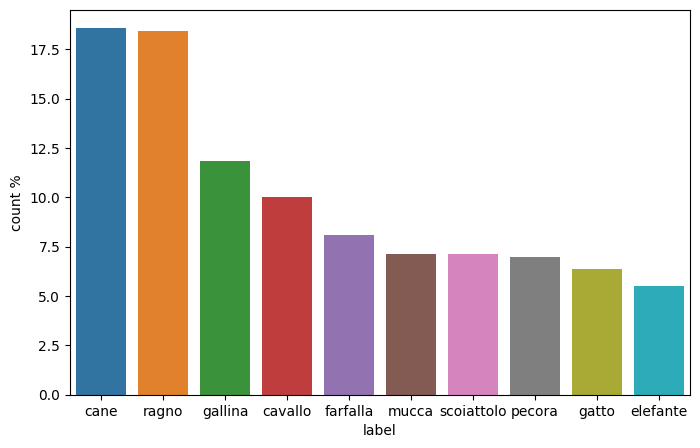

In [8]:
plt.figure(figsize=(8,5))
sns.barplot(x = df['label'], y = df['count %'] * 100, hue=df['label'])
plt.show()